# Will it be delayed?

Everyone who has flown has experienced a delayed or cancelled flight. Both airlines and airports would like to improve their on-time performance and predict when a flight will be delayed or cancelled several days in advance. You are being hired to build a model that can predict if a flight will be delayed. To learn more, you must schedule a meeting with your client (me). To schedule an appointment with your client, send an event request through Google Calendar for a 15 minute meeting. Both you and your project partner must attend the meeting. Come prepared with questions to ask your client. Remember that your client is not a data scientist and you will need to explain things in a way that is easy to understand. Make sure that your communications are efficient, thought out, and not redundant as your client might get frustrated and "fire" you (this only applies to getting information from your client, this does not necessary apply to asking for help with the actual project itself - you should continuously ask questions for getting help).

For this project you must go through most all steps in the checklist. You must write responses for all items as done in the homeworks, however sometimes the item will simply be "does not apply". Keep your progress and thoughts organized in this document and use formatting as appropriate (using markdown to add headers and sub-headers for each major part). Some changes to the checklist:

* Do not do the final part (launching the product).
* Your presentation will be done as information written in this document in a dedicated section (no slides or anything like that). It should include high-level summary of your results (including what you learned about the data, the "accuracy" of your model, what features were important, etc). It should be written for your client, not your professor or teammates. It should include the best summary plots/graphics/data points.
* The models and hyperparameters you should consider during short-listing and fine-tuning will be released at a later time (dependent on how far we get over the next two weeks).
* Data retrieval must be automatic as part of the code (so it can easily be re-run and grab the latest data). Do not commit any data to the repository.
* Your submission must include a pickled final model along with this notebook.

Frame the Problem and Look at the Big Picture
=============================================

1. **Define the objective in business terms:** 
    - The objective for this machine learning model is to be able to figure out whether a delay or cancellation is going to happen.
2. **How will your solution be used?**
    - This model will be used to help notify airlines  a week in advance when a suspected delay is going to happen as a preventative measure to help make sure airline companies have higher ratings and increased profits.
3. **What are the current solutions/workarounds (if any)?** 
    - Currently this is done by humans at each airport but is not as effective due to the massive amounts of data needed 
4. **How should you frame this problem?** 
    - This is a supervised classification problem since we are trying to predict whether a flight is going to run normal, be delayed or cancelled. This could be an online solution due to it being run in real time to predict future outcomes of flights.
5. **How should performance be measured? Is the performance measure aligned with the business objective?** 
    - Our objective is to be able to predict at least 25% of the flights that are going to be delayed or cancelled without falsely predicting any normal flights as going to be delayed or cancelled. This does align with out business objective of being able to predict when there is going to be a delayed or cancelled flight. 
6. **What would be the minimum performance needed to reach the business objective?** 
    - Again the minimum performance that would need to be predicted is 25% of the flights that are going to be delayed or cancelled accurately without falsely predicting that a normal flight is going to be delayed.
7. **What are comparable problems? Can you reuse (personal or readily available) experience or tools?** 
    - We can reuse our bike data as it is also a supervised classification problem. We also have our other homeworks and inclass examples to be able to work off of in terms of setting up the model.
8. **Is human expertise available?** 
    - Yes our client is has experience with flight delays and has provided us with good insight and direction on where to look into for our problem.
9. **How would you solve the problem manually?** 
    - To solve this problem manually we would need to look at all the data for what has caused delays and cancellations the most and calculate a way to see what airports get affected the most to be able to more accurately predict whether or not there is going to be a delay or cancellation.
10. **List the assumptions you (or others) have made so far. Verify assumptions if possible.** 
    - We have made the assumption that weather is going to play a massive role in whether there is going to be a delay or not. Also the size of the airport and number of staff is going to be important in whether an airport can even properly operate which could lead to delays.

Get the Data
============

1. **List the data you need and how much you need:**
    - National flight data for 2023 and 2024
    - Weather data covering all of the same dates, preferably daily.
2. **Find and document where you can get that data:**
    - All of the weather data is available on the NOAA website. You must go through and make an order for each individual airport. The link is here: https://www.ncei.noaa.gov/cdo-web/ 
    - Flight data is from: https://www.transtats.bts.gov/tables.asp?QO_VQ=EFD&QO_anzr=Nv4yv0r 
3. **Get access authorizations**:
   - You must agree to the terms of use and make an order (which is free for digital use).
4. **Create a workspace**: This notebook.
5. **Get the data**: 
    - Download all of the CSV files from the websites mentioned above
6. **Convert the data to a format you can easily manipulate**:
   - The data is all in one parquet file.
7. **Ensure sensitive information is deleted or protected**: This is public data
8. **Check the size and type of data (time series, geographical, …)**:

<mark>TODO</mark>: report your information below. At this point, since you don't want to look at the data too closely, this is a quick evaluation about the number of features and their data types (note: remember that just because all values for a feature are a number doesn't mean that feature is numerical), the number of samples (including possible missing data), and any special considerations about the features such as:

   1. Is it a time series: 
      - Yes

   2. Are any of the features unusable for the business problem? Or are some not available for the business problem when the model will be used?: 
      - Yes, so far all of the features are usable except for diverted flights, because the client doesn't want those accounted

   3. Which feature(s) will be used as the target/label for the business problem? (including which are required to derive the correct label)
      

   4. Should any of the features be stratified during the train/test split to avoid sampling biases?
   

Do not look at the data too closely at this point since you have not yet split off the testing set. Basically, enough looking at it to understand *how* to split the test set off. It is likely you will have to review the website where the data came from to be able to understand some of the features.

In [1]:
#Imports
import numpy as np
import os
import scipy as sp
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [2]:
def load_all_data():
    if os.path.exists('final_data.parquet'):
        print('final_data.parquet already exists, skipping all merging')
        data = pd.read_parquet('final_data.parquet')
        return data
    
    # Load the data
    data = pd.read_parquet('combined.parquet')
    columns_to_keep = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'OriginAirportID', 'Origin', 'OriginCityName', 'OriginStateName' ,'DestAirportID', 'Dest', 'DestCityName', 'DestStateName', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Cancelled', 'CancellationCode', 'CarrierDelay', 'Tail_Number', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'AirTime', 'Flights', 'Distance']
    data = data[columns_to_keep]
    weather_df = pd.read_csv('3964079.csv')

    # Convert 'DATE' to datetime and extract date components
    weather_df['DATE'] = pd.to_datetime(weather_df['DATE'])
    weather_df['Year'] = weather_df['DATE'].dt.year
    weather_df['Month'] = weather_df['DATE'].dt.month
    weather_df['DayofMonth'] = weather_df['DATE'].dt.day

    # Rename 'STATION' to 'WeatherStation' for clarity
    weather_df.rename(columns={'STATION': 'WeatherStation'}, inplace=True)
   
    data['FlightDate'] = pd.to_datetime(data['FlightDate']) 
    airport_to_station = {
    'ATL': 'USW00013874',
    'ORD': 'USW00094846',
    'SEA': 'USW00024233',
    'MIA': 'USW00012839',
    'DFW': 'USW00003927',
    'LAX': 'USW00023174',
    'DEN': 'USW00003017',
    } 
    data['WeatherStation'] = data['Origin'].map(airport_to_station)

    aircraft = pd.read_csv('aircrafts.csv')

    # Merge the data
    combined_df = pd.merge(
    data,
    weather_df,
    on=['Year', 'Month', 'DayofMonth', 'WeatherStation'],
    how='left')

    combined_df['Tail_Number'] = combined_df['Tail_Number'].astype(str)
    aircraft['reg'] = aircraft['reg'].astype(str)

    final_data = pd.merge(
        combined_df,
        aircraft,
        left_on='Tail_Number',
        right_on='reg',
        how='left'
    )
    final_data.to_parquet('final_data.parquet')
    return final_data
    



In [3]:
data = load_all_data()


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825707 entries, 0 to 14825706
Data columns (total 78 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Year                   int64         
 1   Month                  int64         
 2   DayofMonth             int64         
 3   DayOfWeek              int64         
 4   FlightDate             datetime64[ns]
 5   OriginAirportID        int64         
 6   Origin                 object        
 7   OriginCityName         object        
 8   OriginStateName        object        
 9   DestAirportID          int64         
 10  Dest                   object        
 11  DestCityName           object        
 12  DestStateName          object        
 13  DepTime                float64       
 14  DepDelay               float64       
 15  DepDelayMinutes        float64       
 16  ArrTime                float64       
 17  ArrDelayMinutes        float64       
 18  Cancelled           

In [5]:
data.describe()

,Year,Month,DayofMonth,DayOfWeek,FlightDate,OriginAirportID,DestAirportID,DepTime,DepDelay,DepDelayMinutes,...,WT07,WT08,WT09,WT10,id,serial,numSeats,numEngines,ageYears,numRegistrations
count,1.482571e+07,1.482571e+07,1.482571e+07,1.482571e+07,14825707,1.482571e+07,1.482571e+07,1.463667e+07,1.463630e+07,1.463630e+07,...,5178.0,483125.0,5416.0,1047.0,1.421569e+07,1.418652e+07,9.078130e+06,1.383126e+07,1.332507e+07,1.421569e+07
mean,2.023509e+03,6.586377e+00,1.577153e+01,3.983661e+00,2024-01-06 02:34:45.840818944,1.265432e+04,1.265433e+04,1.332564e+03,1.235834e+01,1.565029e+01,...,1.0,1.0,1.0,1.0,4.397632e+05,2.675482e+06,1.431214e+02,2.000781e+00,1.456669e+01,1.489753e+00
min,2.023000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2023-01-01 00:00:00,1.013500e+04,1.013500e+04,1.000000e+00,-9.900000e+01,0.000000e+00,...,1.0,1.0,1.0,1.0,3.390000e+02,2.400000e+01,1.000000e+00,2.000000e+00,3.000000e-01,1.000000e+00
25%,2.023000e+03,4.000000e+00,8.000000e+00,2.000000e+00,2023-07-08 00:00:00,1.129200e+04,1.129200e+04,9.120000e+02,-6.000000e+00,0.000000e+00,...,1.0,1.0,1.0,1.0,1.127000e+04,1.012400e+04,1.000000e+02,2.000000e+00,7.600000e+00,1.000000e+00
50%,2.024000e+03,7.000000e+00,1.600000e+01,4.000000e+00,2024-01-07 00:00:00,1.288900e+04,1.288900e+04,1.325000e+03,-2.000000e+00,0.000000e+00,...,1.0,1.0,1.0,1.0,2.326000e+04,3.196800e+04,1.540000e+02,2.000000e+00,1.250000e+01,1.000000e+00
75%,2.024000e+03,1.000000e+01,2.300000e+01,6.000000e+00,2024-07-08 00:00:00,1.402700e+04,1.402700e+04,1.746000e+03,9.000000e+00,9.000000e+00,...,1.0,1.0,1.0,1.0,1.532640e+05,6.012200e+04,1.790000e+02,2.000000e+00,2.120000e+01,2.000000e+00
max,2.024000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2024-12-31 00:00:00,1.686900e+04,1.686900e+04,2.400000e+03,5.764000e+03,5.764000e+03,...,1.0,1.0,1.0,1.0,2.145037e+06,1.900064e+07,2.370000e+03,3.000000e+00,1.817600e+03,8.000000e+00
std,4.999182e-01,3.403419e+00,8.781058e+00,2.007278e+00,NaN,1.526151e+03,1.526147e+03,5.077571e+02,5.612929e+01,5.507429e+01,...,0.0,0.0,0.0,0.0,8.109452e+05,6.182807e+06,6.389640e+01,2.794294e-02,2.779567e+01,8.652182e-01


In [6]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,FlightDate,OriginAirportID,Origin,OriginCityName,OriginStateName,DestAirportID,...,registrationDate,typeName,numEngines,engineType,isFreighter,productionLine,ageYears,verified,numRegistrations,firstRegistrationDate
0,2023,12,30,6,2023-12-30,12339,IND,"Indianapolis, IN",Indiana,12953,...,2013-06-26,Canadair CRJ 900,2.0,Jet,False,Canadair CRJ 900,17.1,True,3.0,2008-02-22
1,2023,12,30,6,2023-12-30,12953,LGA,"New York, NY",New York,12339,...,2013-06-26,Canadair CRJ 900,2.0,Jet,False,Canadair CRJ 900,17.1,True,3.0,2008-02-22
2,2023,12,1,5,2023-12-01,12953,LGA,"New York, NY",New York,15016,...,2020-03-25,Canadair CRJ 900,2.0,Jet,False,Canadair CRJ 900,NaN,True,3.0,2008-03-27
3,2023,12,3,7,2023-12-03,12953,LGA,"New York, NY",New York,15016,...,2018-02-13,Canadair CRJ 900,2.0,Jet,False,Canadair CRJ 900,17.4,True,3.0,2007-10-23
4,2023,12,4,1,2023-12-04,12953,LGA,"New York, NY",New York,15016,...,2018-03-12,Canadair CRJ 900,2.0,Jet,False,Canadair CRJ 900,17.3,True,3.0,2007-12-06


In [7]:
def split_data(data):
    data['stratify_col'] = data['Cancelled'].astype(str) + '_' + (data['DepDelayMinutes'] > 15).astype(str)


    train_data, test_data = train_test_split(
        data,
        test_size=0.2,
        random_state=31,
        stratify=data['stratify_col']
    )

    train_data = train_data.drop('stratify_col', axis=1)
    test_data = test_data.drop('stratify_col', axis=1)
    return train_data, test_data

train_set, test_set = split_data(data)

In [8]:
train_set.to_parquet('train_set.parquet')
test_set.to_parquet('test_set.parquet')

Explore the Data
================

Notes:
* I want lots of written information, the only code to keep when submitting is the code to output numbers, tables, or plots that you refer to in your writing
* During exploration, it is reasonable to remove unreasonable outliers (and document that you are doing so and how you are classifying what an outlier is) before doing further analysis
  * There are differences in outliers: ones that are real and ones that are errors. For example, if a height was entered as 7'1" for Shaq O'Neal, that is a real outlier, it has meaning. If a height was entered as 7'1" for a random person, that is an error. You should (try to) remove (only) the error/non-useful ones.
* You will need to explore how to work with date-times, Pandas has a very wide range of utilities for working with them, one particular thing to possibly use is extracting components of the date-time (like hours in the day or day-of-week)
* Document all important things, make sure to put headers for the separate steps, and keep everything organized

Reminder about the 9 steps (points in parentheses):
1. Copy the data for exploration, downsampling to a manageable size if necessary.
2. Study each attribute and its characteristics: Name; Type (categorical, numerical, bounded, text, structured, …); % of missing values; Noisiness and type of noise (stochastic, outliers, rounding errors, …); Usefulness for the task; Type of distribution (Gaussian, uniform, logarithmic, …) (format as a nice markdown table!)
3. For supervised learning tasks, identify the target attribute(s)
4. Visualize the data
5. Study the correlations between attributes
6. Study how you would solve the problem manually (using the data you have)
7. Identify the promising transformations you may want to apply
8. Identify extra data that would be useful (discuss it, but don't actually go through with it)
9. Document what you have learned (included in the other steps - it is actually worth most of the points!)

In [9]:
# Check the data types and missing values for each column
column_summary = data.info()

# Calculate the percentage of missing values for each column
missing_values = data.isnull().mean() * 100

# Create a summary dataframe
attribute_summary = pd.DataFrame({
    'Attribute': data.columns,
    'Type': data.dtypes,
    'Missing Values (%)': missing_values
})

# Show the summary
attribute_summary.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825707 entries, 0 to 14825706
Data columns (total 79 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Year                   int64         
 1   Month                  int64         
 2   DayofMonth             int64         
 3   DayOfWeek              int64         
 4   FlightDate             datetime64[ns]
 5   OriginAirportID        int64         
 6   Origin                 object        
 7   OriginCityName         object        
 8   OriginStateName        object        
 9   DestAirportID          int64         
 10  Dest                   object        
 11  DestCityName           object        
 12  DestStateName          object        
 13  DepTime                float64       
 14  DepDelay               float64       
 15  DepDelayMinutes        float64       
 16  ArrTime                float64       
 17  ArrDelayMinutes        float64       
 18  Cancelled           

,Attribute,Type,Missing Values (%)
Year,Year,int64,0.0
Month,Month,int64,0.0
DayofMonth,DayofMonth,int64,0.0
DayOfWeek,DayOfWeek,int64,0.0
FlightDate,FlightDate,datetime64[ns],0.0


In [10]:
# The target attribute is 'Cancelled'
target_attribute = 'Cancelled'


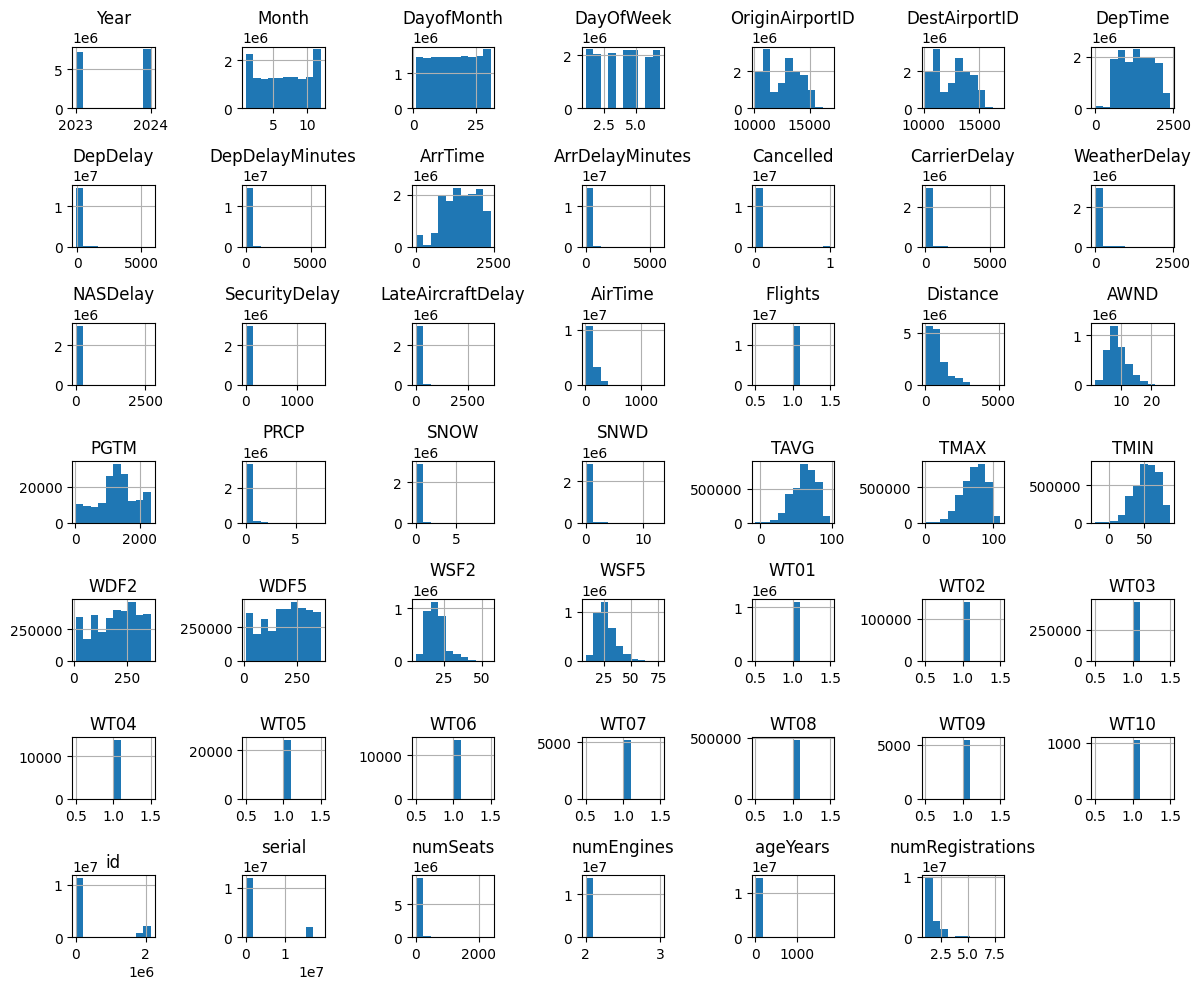

In [12]:
# Plot histograms for all numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


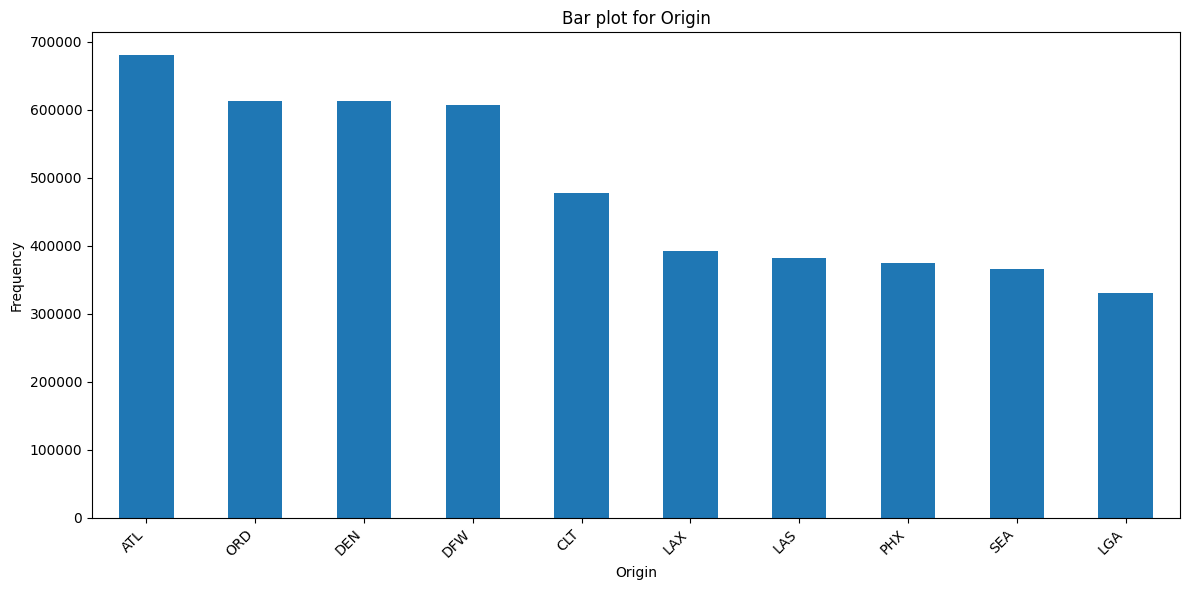

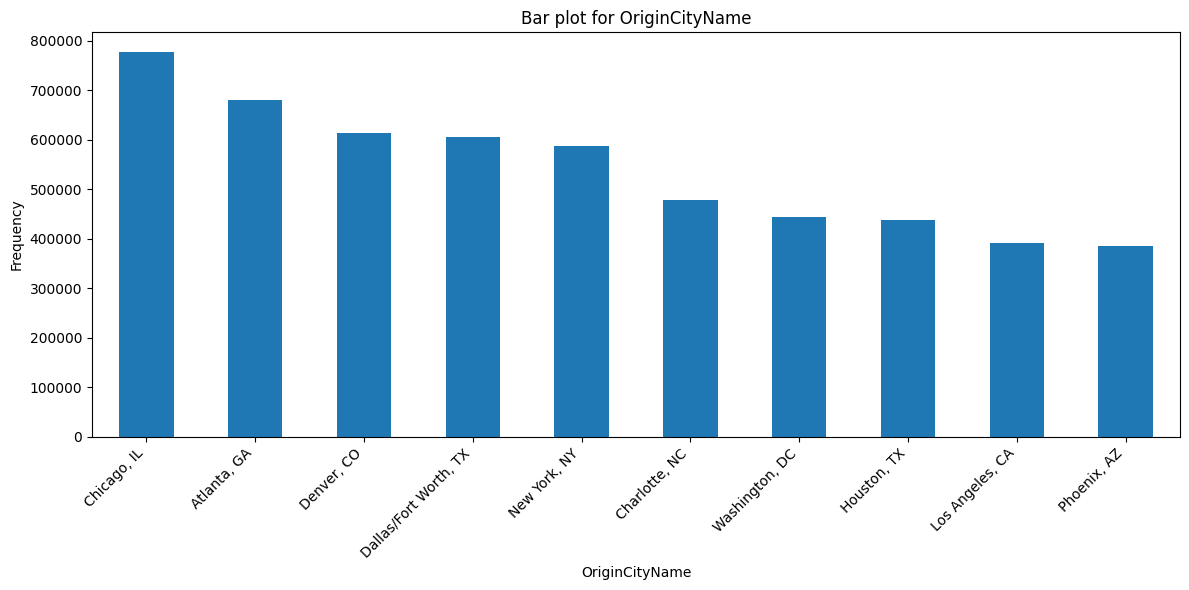

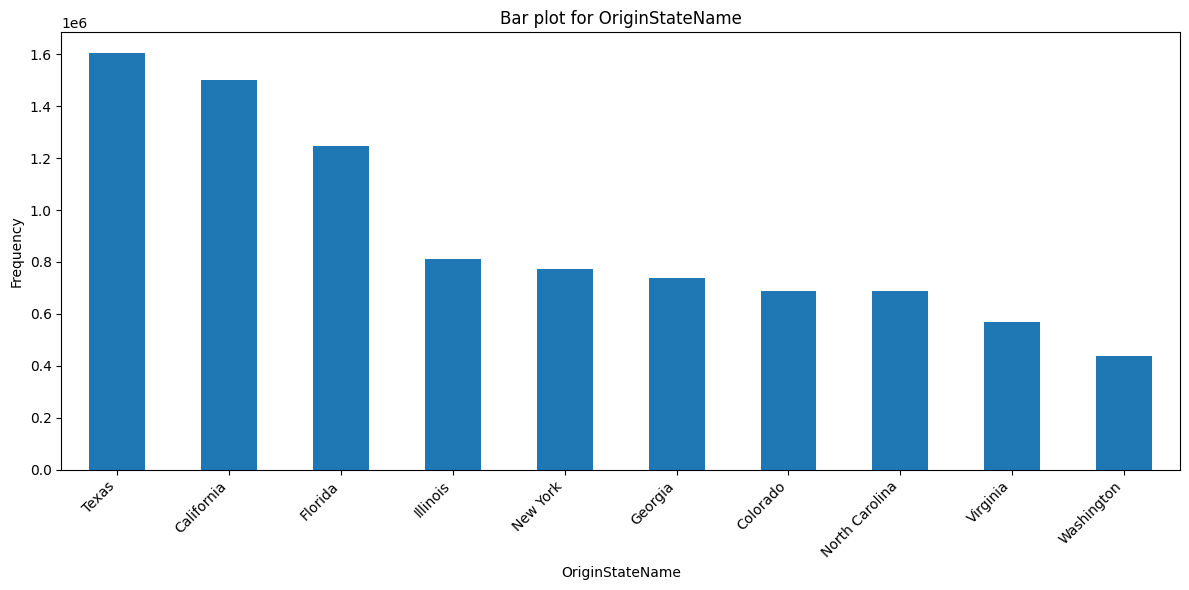

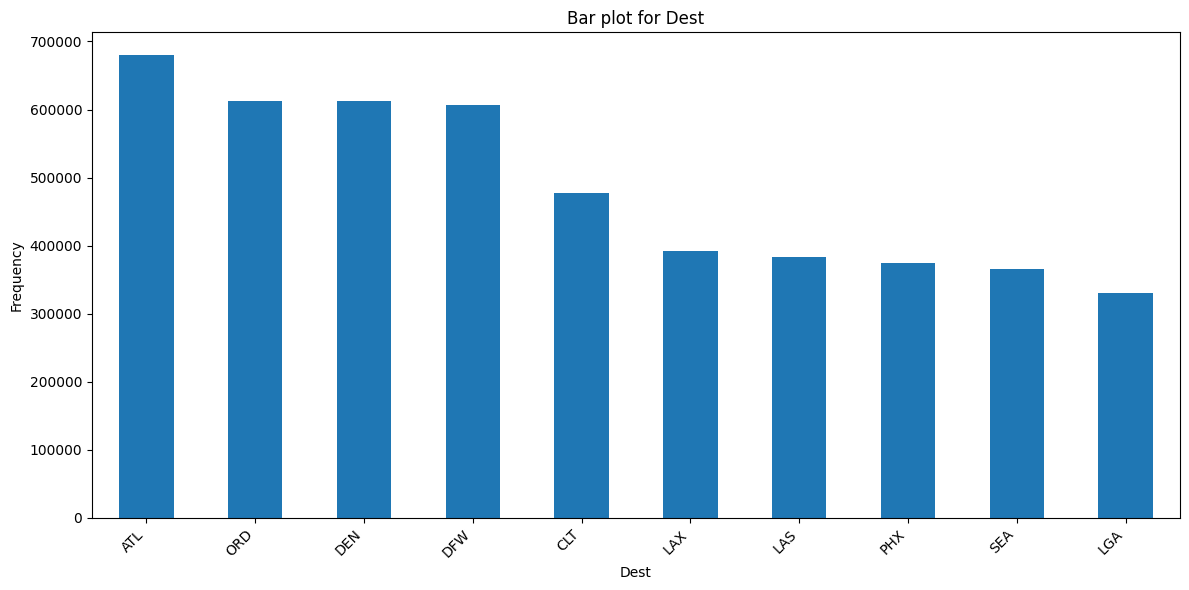

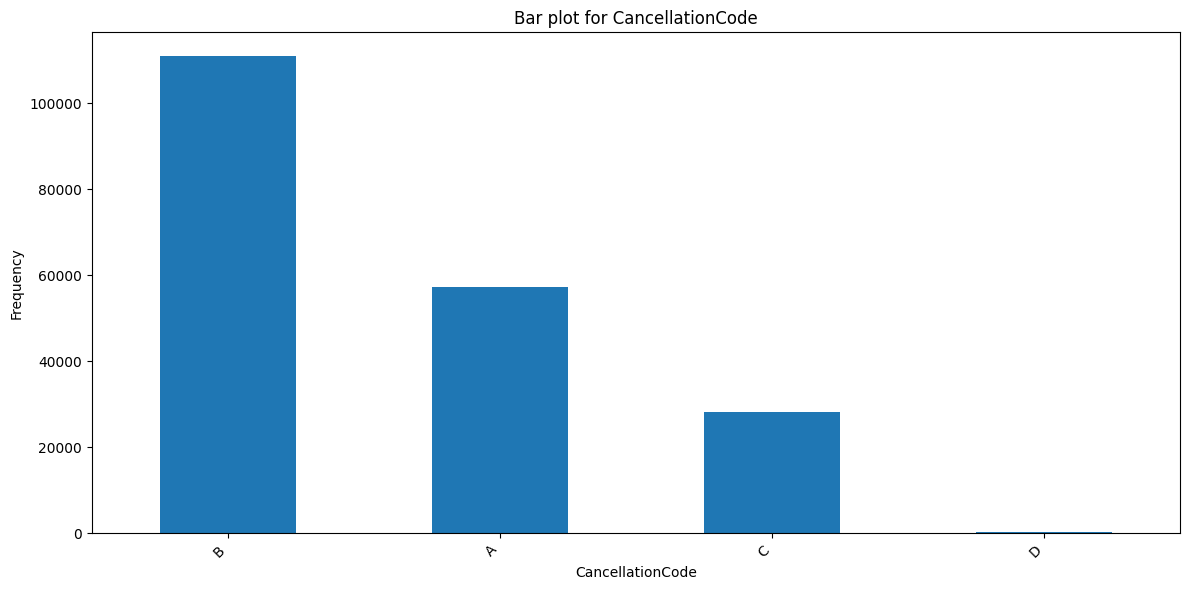

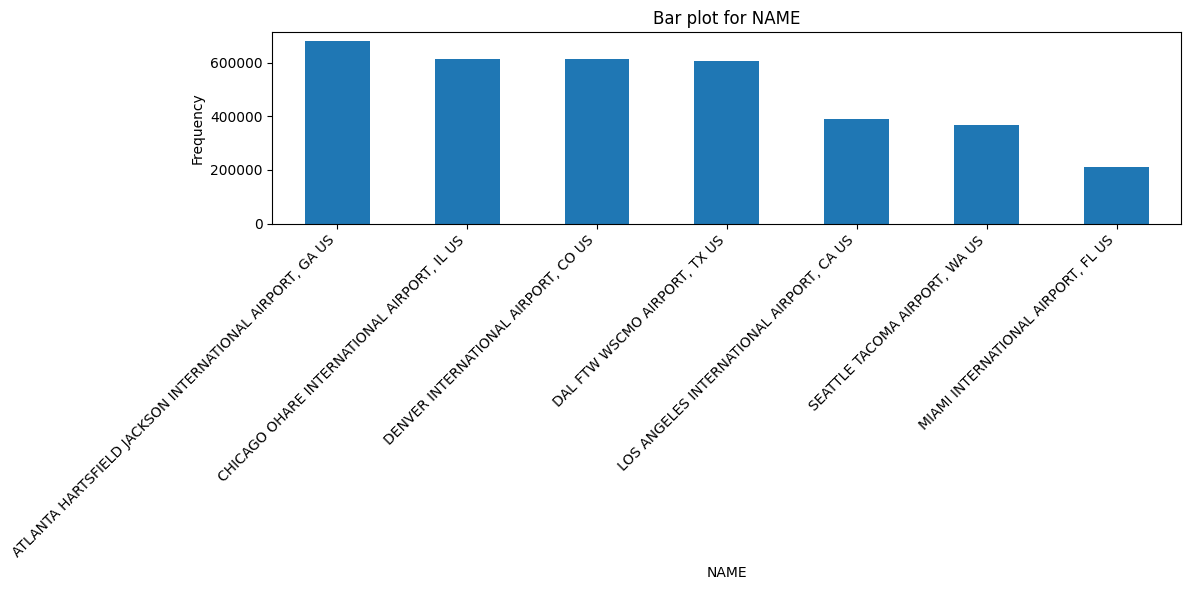

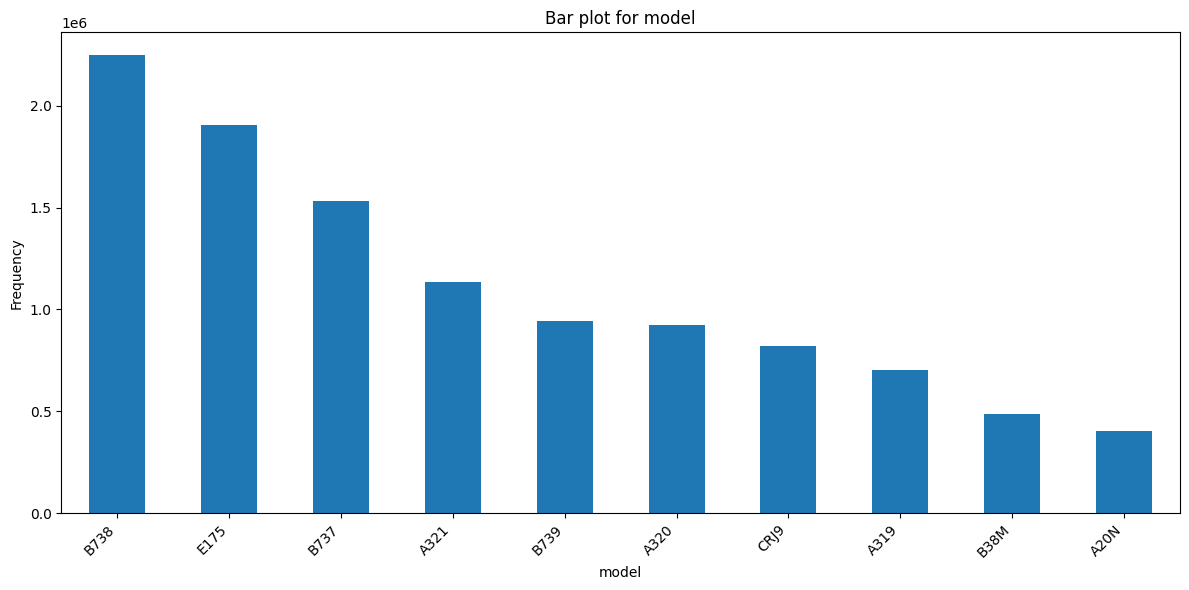

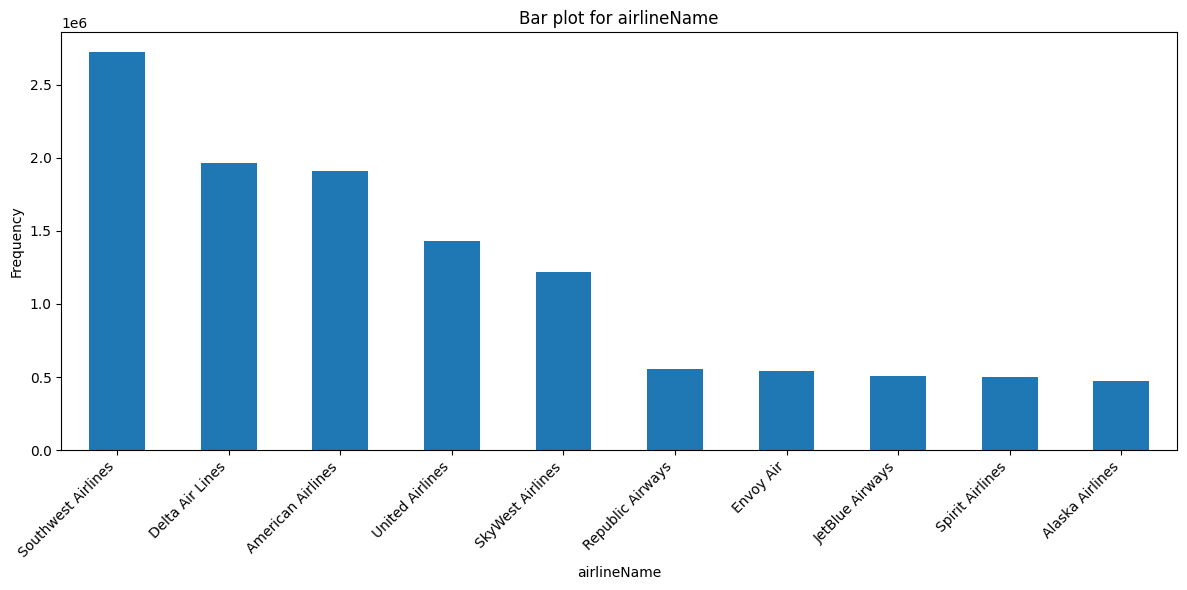

In [17]:
# List of columns to plot bar plots for
columns_to_plot = ['Origin', 'OriginCityName', 'OriginStateName', 'Dest', 'CancellationCode', 'NAME', 'model', 'airlineName']

for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    
    # Count the occurrences of each category
    value_counts = data[column].value_counts()
    
    # Limit to top N categories (e.g., top 10)
    top_n = 10
    value_counts = value_counts.head(top_n)
    
    # Plot the bar plot
    value_counts.plot(kind='bar')
    
    # Set the title and labels
    plt.title(f'Bar plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Rotate the x-axis labels for readability
    plt.xticks(rotation=45, ha='right')
    
    # Display the plot
    plt.tight_layout()  # Adjust layout to make space for labels
    plt.show()



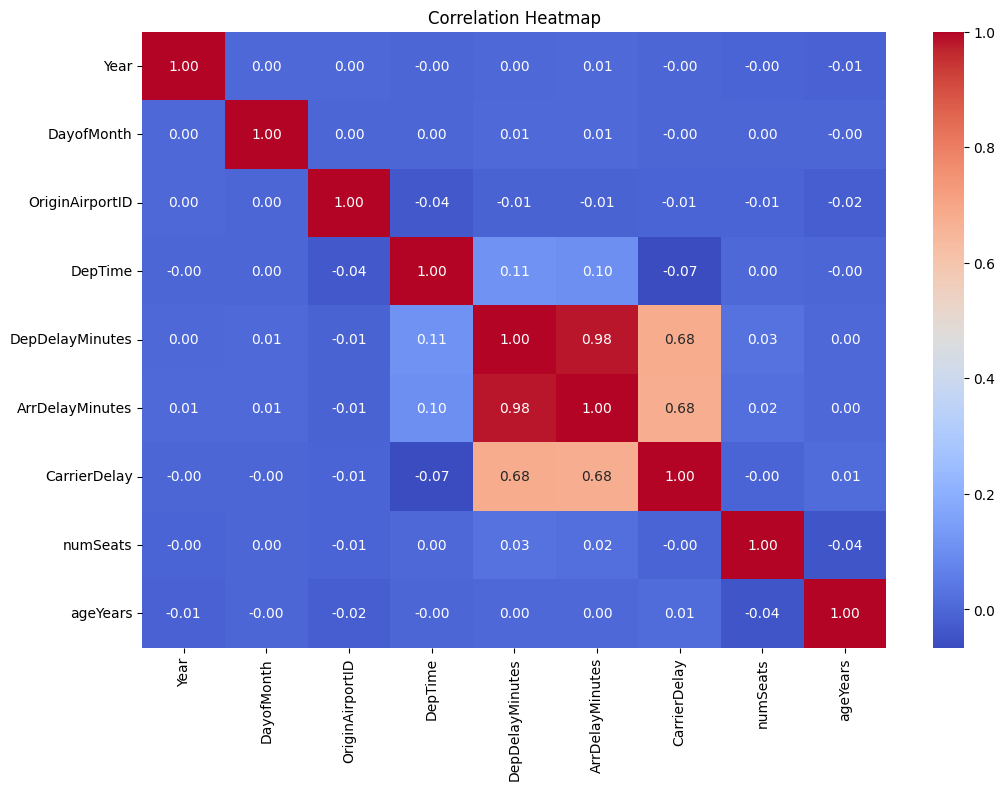

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of specific columns to compute correlation for
columns_to_include = ['Year', 'DayofMonth', 'OriginAirportID', 'DepTime', 'DepDelayMinutes', 'ArrDelayMinutes', 'CarrierDelay', 'numSeats', 'ageYears']

# Compute correlation matrix for the selected numerical columns
corr_matrix = data[columns_to_include].corr()

# Plot a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Prepare the Data

Note: the word *optional* simply means not all datasets will require it, it does not mean you can just choose not to do it if it is needed for a particular dataset.

1. Data cleaning: Fix/remove outliers (optional); Fill in missing values (with 0, mean, median…) or drop rows/columns
2. Feature selection (optional): Drop attributes that provide no useful information for the task
3. Feature engineering, where appropriate: Discretize continuous features; Decompose features (categorical, date/time, …), Add promising transformations of features ($\log(x)$, $\sqrt{x}$, $x^2$, …); Aggregate features into promising new features
4. Feature scaling: standardize or normalize features

Short-List Promising Models
======
1. Train many quick and dirty models from different categories (e.g. linear, naive
Bayes, SVM, Random Forests, neural net, ...) using standard parameters
2. Measure and compare their performance. For each model, use 𝑁𝑁-fold cross-
validation and compute the mean and standard deviation of the performance
measure on the 𝑁𝑁 folds.
3. Analyze the most significant variables for each algorithm
4. Analyze the types of errors the models make. What data would a human have used to avoid these errors?
5. Have a quick round of feature selection and engineering
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors

Fine-Tune the System
======
1. Fine-tune the hyperparameters using cross-validation. Treat your data
transformation choices as hyperparameters, especially when you are not sure
about them. Unless there are very few hyperparameter values to explore, prefer
random search over grid search. If training is very long, you may prefer a Bayesian
optimization approach.
2. Try Ensemble methods. Combining your best models will often perform better
than running them individually.
3. Once you are confident about your final model, measure its performance on the
test set to estimate the generalization error.

Present Your Solution
=====
1. Document what you have done
2. Create a nice presentation, highlighting the big picture first
3. Explain why your solution achieves the business objective
4. Don’t forget to present interesting points you noticed along the way: Describe what worked and what did not; List your
assumptions and your system’s limitations
5. Ensure your key findings are communicated through beautiful visualizations or easy-to-remember statements (e.g. “the
median income is the number-one predictor of housing prices”)